# Week5B (Basic)

## Question 1

We wish to cluster the following set of points:

<img src="https://d396qusza40orc.cloudfront.net/mmds/images/otc_gold.gif" style="float:left">

<br clear="all"/>

into 10 clusters. We initially choose each of the green points (25,125), (44,105), (29,97), (35,63), (55,63), (42,57), (23,40), (64,37), (33,22), and (55,20) as a centroid. Assign each of the gold points to their nearest centroid. (Note: the scales of the horizontal and vertical axes differ, so you really need to apply the formula for distance of points; you can't just "eyeball" it.) Then, recompute the centroids of each of the clusters. Do any of the points then get reassigned to a new cluster on the next round? Identify the true statement in the list below. Each statement refers either to a centroid AFTER recomputation of centroids (precise to one decimal place) or to a point that gets reclassified.

<ol>
<li>There is a centroid after recomputation at (51.1,105.5)
<li>There is a centroid after recomputation at (34.3,133.3)
<li>There is a centroid after recomputation at (55,63)
<li>There is a centroid after recomputation at (46,58.5)
</ol>

In [97]:
import numpy as np
from collections import defaultdict

centroids = np.array([(25,125),
                      (44,105),
                      (29,97),
                      (35,63),
                      (55,63), 
                      (42,57), 
                      (23,40), 
                      (64,37), 
                      (33,22), 
                      (55,20)])

points = np.array([(28, 145),
                   (65, 140),
                   (50, 130), 
                   (55, 118), 
                   (38, 115), 
                   (50, 90), 
                   (63, 88), 
                   (43, 83), 
                   (50, 60), 
                   (50, 30)])

def recompute(d):
    centers = []
    for k, v in d.items():
        l = np.append(v, k).reshape((-1, 2))
        centers.append(np.mean(l, axis=0))
    return centers
        
def cluster(points, cluster_centers):
    c = defaultdict(list)
    for p in points:
        d = [np.linalg.norm(x-p) for x in cluster_centers]
        m = np.argmin(d)
        c[tuple(cluster_centers[m])].append(p)
    return c

d = cluster(points, centroids)
r = np.around(recompute(d), decimals=1)
print(r)

[[  52.5   25. ]
 [  34.3  133.3]
 [  52.5  109.3]
 [  52.5   61.5]
 [  36.    90. ]]


## Question 2

When performing a k-means clustering, success depends very much on the initially chosen points. Suppose that we choose two centroids (a,b) = (5,10) and (c,d) = (20,5), and the data truly belongs to two rectangular clusters, as suggested by the following diagram:

<img src="https://d396qusza40orc.cloudfront.net/mmds/images/otc_sq-clust.gif" style="float:left"/>

<br clear="all"/>

Under what circumstances will the initial clustering be successful? That is, under what conditions will all the yellow points be assigned to the centroid (5,10), while all of the blue points are assigned to cluster (20,5))? Identify in the list below, a pair of rectangles (described by their upper left corner, UL, and their lower-right corner LR) that are successfully clustered.

<ol>
<li>Yellow: UL=(3,3) and LR=(10,1); Blue: UL=(13,10) and LR=(16,4)
<li>Yellow: UL=(6,7) and LR=(11,4); Blue: UL=(14,10) and LR=(23,6)
<li>Yellow: UL=(3,15) and LR=(13,7); Blue: UL=(14,10) and LR=(23,6)
<li>Yellow: UL=(6,15) and LR=(13,7); Blue: UL=(16,16) and LR=(18,5)
</ol>

In [267]:
def assign_to_cluster(p, c):
    """ Assign a point the the closest cluster """
    d = [np.linalg.norm(p-x) for x in c]
    return np.argmin(d)

def make_mesh_grid(ul, lr):
    """ Generate a meshgrid representing the square """
    delta = np.absolute(ul-lr) + 1
    x = np.linspace(lr[0], ul[0], delta[0])
    y = np.linspace(lr[1], ul[1], delta[1])
    return np.meshgrid(x, y)

# Cluster centers
centroids = np.array([[5, 10], [20, 5]])
    
# Set of rectangles
rectangles = [[np.array([(3, 3), (10, 1)]), np.array([(13, 10), (16, 4)])],
              [np.array([(6, 7), (11, 4)]), np.array([(14, 10), (23, 6)])],
              [np.array([(3, 15), (13, 7)]), np.array([(14, 10), (23, 6)])],
              [np.array([(6, 15), (13, 7)]), np.array([(16, 16), (18, 5)])]]

# Clustering counts and number of points in each meshgrid
counts, points = [], []

for rectangle in rectangles:
    for color in rectangle:
        cluster_count = 0
        X, Y = make_mesh_grid(color[0], color[1])
        # Calculate the number of points in the meshgrid
        points.append(len(X.flatten()) * len(Y.flatten()))
        # For every point in the meshgrid
        for x in X.flatten():
            for y in Y.flatten():
                # Check what cluster it is assigned to
                cluster_count += assign_to_cluster((x, y), centroids)  
        counts.append(cluster_count)

# Note that If every point in a rectangle is assigned to yellow the count is 0     
for i in range(0, len(points), 2):
    print(counts[i] == 0 and counts[i+1] == points[i+1])

False
True
False
False


### Explanation of my MeshGrid approach

As a lazy solution to this problem i decided to make use of numpy meshgrid. To give an illustration of why this work i will plot the meshgrids for the first two squares and show how they relate to the cluster centers. In my approach i classify all the meshgrid points and see if they all meshgrid points are assigned to the correct cluster.

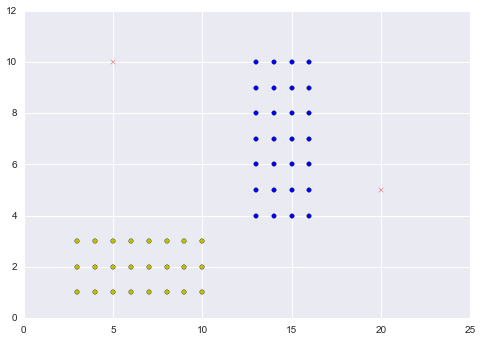

In [265]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

ax = plt.axes()

# Colors: Yellow and Blue
colors = ["y", "b"]

ax.scatter(centroids[:,0], centroids[:,1], c="r", marker="x")

for i, color in enumerate(rectangles[0]):
    X, Y = make_mesh_grid(color[0], color[1])
    ax.scatter(X, Y, c = colors[i], marker="o");

## Question 3

Suppose we apply the BALANCE algorithm with bids of 0 or 1 only, to a situation where advertiser A bids on query words x and y, while advertiser B bids on query words x and z. Both have a budget of $2. Identify in the list below a sequence of four queries that will certainly be handled optimally by the algorithm.

<ol>
<li>yyxx
<li>xyyz
<li>xxxy
<li>yxxz
</ol>

In [23]:
def isValid(a, b):
    if a["budget"] >= 0 <= b["budget"]:
        return True
    return False
    
def determine_outcome(a, b, query):
    """ Simple recursive function to simulate all possible outcomes when using the BALANCE algorithm"""

    if len(query) > 0:
        
        query_word, query = query[0], query[1:]
        
        # If conflicting interests
        if query_word in a["bids"] and query_word in b["bids"]:
            
            #If draw
            if a["budget"] == b["budget"]:
                a_copy, b_copy = a.copy(), b.copy()
                a_copy["budget"] -= 1
                b_copy["budget"] -= 1
                # See if any possible outcomes are invalid
                return min(determine_outcome(a, b_copy, query),
                           determine_outcome(a_copy, b, query))   
            
            elif a["budget"] > b["budget"]:
                a["budget"] -= 1  
                
            else:
                b["budget"] -= 1
           
        # If only advertiser a is interested
        elif query_word in a["bids"]:
            a["budget"] -= 1
            
        # If only advertiser b is interested
        elif query_word in b["bids"]:
            b["budget"] -= 1
            
        # If no buyers
        return determine_outcome(a, b, query)
    
    # If query sequence has been emptied
    else:
        return isValid(a, b)

query_sequences = ["yyxx", "xyyz", "xxxy", "yxxz"]

advertiser_a = {"advertiser": "A", "budget": 2.0, "bids": ["x", "y"]}
advertiser_b = {"advertiser": "B", "budget": 2.0, "bids": ["x", "z"]}

for i, query_sequence in enumerate(query_sequences):
    a, b = advertiser_a.copy(), advertiser_b.copy()
    print(str(i+1) + ":", determine_outcome(a, b, query_sequence))  

1: True
2: False
3: False
4: False


## Question 4

The set cover problem is: given a list of sets, find a smallest collection of these sets such that every element in any of the sets is in at least one set of the collection. As we form a collection, we say an element is covered if it is in at least one set of the collection. Note: In this problem, we shall represent sets by concatenating their elements, without brackets or commas. For example, {A,B} will be represented simply as AB. There are many greedy algorithms that could be used to pick a collection of sets that is close to as small as possible. Here are some that you will consider in this problem. Dumb: Select sets for the collection in the order in which they appear on the list. Stop when all elements are covered. Simple: Consider sets in the order in which they appear on the list. When it is considered, select a set if it has at least one element that is not already covered. Stop when all elements are covered. Largest-First: Consider sets in order of their size. If there are ties, break the tie in favor of the one that appears first on the list. When it is considered, select a set if it has at least one element that is not already covered. Stop when all elements are covered. Most-Help: Consider sets in order of the number of elements they contain that are not already covered. If there are ties, break the tie in favor of the one that appears first on the list. Stop when all elements are covered. Here is a list of sets: AB, BC, CD, DE, EF, FG, GH, AH, ADG, ADF First, determine the optimum solution, that is, the fewest sets that can be selected for a collection that covers all eight elements A,B,...,H. Then, determine the sizes of the collections that will be constructed by each of the four algorithms mentioned above. Compute the ratio of the size returned by the algorithm to the optimum size, and identify one of these ratios in the list below, correct to two decimal places.

<ol>
<li>The ratio for Simple is 1.75
<li>The ratio for Largest-First is 1.75
<li>The ratio for Dumb is 1.50
<li>The ratio for Simple is 2.00
</ol>

In [230]:
NUM_ELEMENTS = 8

def dumb(l, collection=set([])):
    for i, s in enumerate(l):
        collection.update(s)
        if len(collection) == NUM_ELEMENTS:
            return i + 1
        
def simple(l, i = 0, collection=set([])):
    while len(collection) < NUM_ELEMENTS:
        diff = [1 if len(x.difference(collection)) > 0 else 0 for x in l]
        j = diff.index(max(diff))
        collection.update(l[j])
        i += 1
    return i  
    
def largest_first(l, i = 0, collection=set([])):
    while len(collection) < NUM_ELEMENTS:
        diff = [len(x) for x in l]
        j = diff.index(max(diff))
        collection.update(l[j])
        del l[j]
        i += 1
    return i
    
def most_help(l, i = 0, collection=set([])):
    while len(collection) < NUM_ELEMENTS:
        diff = [len(x.difference(collection)) for x in l]
        j = diff.index(max(diff))
        collection.update(l[j])
        i += 1
    return i

list_of_sets = [set(["A", "B"]),
                set(["B", "C"]),
                set(["C", "D"]),
                set(["D", "E"]),
                set(["E", "F"]),
                set(["F", "G"]),
                set(["G", "H"]),
                set(["A", "H"]),
                set(["A", "D", "G"]),
                set(["A", "D", "F"])]

d = dumb(list_of_sets)
s = simple(list_of_sets)
l = largest_first(list_of_sets.copy())
m = most_help(list_of_sets)

print("1:", s/m == 1.75)
print("2:", l/m == 1.75)
print("3:", d/m == 1.5)
print("4:", s/m == 2.00)

1: True
2: False
3: False
4: False


## Question 5

This bipartite graph:

<img src="https://d396qusza40orc.cloudfront.net/mmds/images/otc.gif"/ style="float:left">

<br clear="all">

Has several perfect matchings. Find all the perfect matchings and then identify, in the list below, a pair of edges that can appear together in a perfect matching.

<ol>
<li>a0-b0 and a1-b3
<li>a1-b2 and a0-b1
<li>a4-b3 and a3-b1
<li>a2-b0 and a3-b1
</ol>

In [240]:
def perfect_match(graph, row = 0, selection = []):
    if row == len(graph):
        perfect_matches.append(selection.copy())    
    else:
        # For every node in b a points to
        for b in graph[row]:
            # If a vertice to node b not has been selected
            if b not in selection:
                selection.append(b)
                perfect_match(graph, row + 1, selection)
                selection.pop() #Backtrack

#Biparte Graph               
biparte_graph = [[0, 1],
                 [2, 3], 
                 [0, 4], 
                 [1, 2], 
                 [3, 4]]

perfect_matches = []
perfect_match(B)
print(perfect_matches)

[[0, 2, 4, 1, 3], [1, 3, 0, 2, 4]]
